In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import preprocessing

In [3]:
dfx = pd.read_csv('Diabetes_XTrain.csv')
dfy = pd.read_csv('Diabetes_YTrain.csv')

print(dfx.shape)
print(dfy.shape)

(576, 8)
(576, 1)


<AxesSubplot:xlabel='Outcome', ylabel='count'>

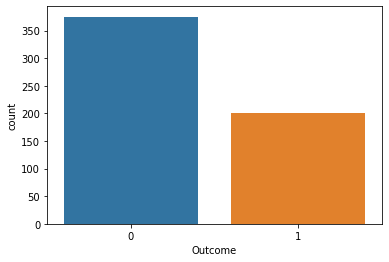

In [4]:
sns.countplot(x = 'Outcome', data = dfy)

In [157]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(dfx)
dfx = pd.DataFrame(scaled_df, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [158]:
dfx.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.974572,1.525281,0.945995,1.362427,2.244145,0.780366,0.907501,0.593634
1,1.275243,-0.316834,0.353934,-1.282400,-0.698144,-0.499183,-0.726400,2.110340
2,0.974572,0.858308,0.353934,-1.282400,-0.698144,0.928006,-0.666985,0.846418
3,-0.528785,-0.634440,-0.139449,-0.022959,0.126796,0.128288,1.145159,-0.417504
4,0.072558,0.286617,0.847318,-0.022959,1.776678,0.398962,-0.744224,-0.838811


In [159]:
dfy.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [160]:
X = dfx.values
Y = dfy.values

In [161]:
print(X.shape)
print(Y.shape)

(576, 8)
(576, 1)


In [162]:
Y = Y.reshape((-1, ))

In [163]:
print(Y.shape)

(576,)


In [164]:
print(X)

[[ 0.97457151  1.52528095  0.94599501 ...  0.78036618  0.907501
   0.59363371]
 [ 1.27524274 -0.31683408  0.35393439 ... -0.49918316 -0.72639999
   2.11034006]
 [ 0.97457151  0.85830827  0.35393439 ...  0.92800649 -0.66698541
   0.8464181 ]
 ...
 [-0.52878465  0.06429317 -0.43547977 ... -0.25311598  0.69954996
  -0.92307263]
 [ 0.07255781  1.0806325   0.15658085 ... -0.06856559 -0.42635635
   0.34084932]
 [-0.82945588 -1.01556737  0.45261116 ...  0.01755792 -0.34614667
  -0.33324239]]


In [165]:
print(Y)

[1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 1 1 0 0 0 0 0 1 1 0 0 

In [166]:
def dist(x1, x2) :
    return np.sqrt(sum((x1-x2)**2))

In [167]:
def knn(X, Y, queryPoint, k = 5) :
    vals = []
    m = X.shape[0] # Total points
    for i in range(m) :
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
    vals = sorted(vals)
    # Nearest/First k points
    vals = vals[:k]
    vals = np.array(vals)
    # print(vals)
    new_vals = np.unique(vals[:,1], return_counts = True)
    # print(new_vals)
    max_freq_index = new_vals[1].argmax()
    pred = new_vals[0][max_freq_index]
    return pred

In [189]:
dftrain = pd.read_csv('Diabetes_Xtest.csv')

In [190]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(dftrain)
dftrain = pd.DataFrame(scaled_df, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [191]:
dftrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.180700,1.699357,1.236071,0.307043,-0.005323,0.580570,-0.412980,0.079340
1,-0.605333,-0.924366,-0.366231,0.679373,0.528583,0.792893,0.739987,-0.977305
2,-0.605333,-0.291054,-0.119723,0.058823,-0.691775,-0.523509,-1.123976,-0.801198
3,2.559181,-1.437047,-0.612740,-1.306387,-0.691775,0.056841,-0.842139,0.607663
4,-0.893016,-1.316416,0.250039,-0.623782,-0.234140,-0.339495,0.269192,-1.065359


In [192]:
X_test = dftrain.values

In [193]:
X_test.shape

(192, 8)

In [220]:
pred = []

In [221]:
total_cases = X_test.shape[0]

for i in range(total_cases) :
    pred.append(int(knn(X, Y, X_test[i], 13)))

In [222]:
print(pred)

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


In [223]:
predictions = np.array(pred)

In [224]:
print(predictions.shape)

(192,)


In [225]:
df_test = pd.DataFrame(predictions, dtype = 'uint8', columns = ['Outcome'])

In [226]:
df_test.head()

,Outcome
0,1
1,0
2,0
3,0
4,0


In [227]:
df_test.to_csv('test_answers.csv', index = False)

In [202]:
split = int(0.8 * X.shape[0])
print(split)

460


In [203]:
x_train = X[:split, :]
y_train = Y[:split]

x_test = X[split:, :]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(460, 8) (460,)
(116, 8) (116,)


In [204]:
total_cases = x_test.shape[0]
correct_pred2 = 0

for i in range(total_cases) :
    pred = int(knn(X, Y, x_test[i], 10))
    actual = y_test[i]
    if pred == actual :
        correct_pred2 += 1

print(correct_pred2 * 100 / total_cases)

76.72413793103448


In [ ]:
for k in range(1, 100, 2) :
    total_cases = x_test.shape[0]
    correct_pred2 = 0

    for i in range(total_cases) :
        pred = int(knn(X, Y, x_test[i], k))
        actual = y_test[i]
        if pred == actual :
            correct_pred2 += 1

    print(k, correct_pred2 * 100 / total_cases)

In [208]:
for k in range(1, 100, 2) :
    total_cases = x_test.shape[0]
    correct_pred2 = 0

    for i in range(total_cases) :
        pred = int(knn(X, Y, x_test[i], k))
        actual = y_test[i]
        if pred == actual :
            correct_pred2 += 1

    print(k, correct_pred2 * 100 / total_cases)

1 100.0
3 83.62068965517241
5 82.75862068965517
7 81.03448275862068
9 78.44827586206897
11 77.58620689655173
13 76.72413793103448
15 76.72413793103448
17 75.0
19 77.58620689655173
21 77.58620689655173
23 76.72413793103448
25 72.41379310344827
27 74.13793103448276
29 76.72413793103448
31 75.86206896551724
33 75.0
35 75.86206896551724
37 74.13793103448276
39 74.13793103448276
41 75.86206896551724
43 75.0
45 74.13793103448276
47 73.27586206896552
49 74.13793103448276
51 74.13793103448276
53 75.0
55 75.86206896551724
57 75.86206896551724
59 75.86206896551724
61 75.86206896551724
63 75.86206896551724
65 76.72413793103448
67 75.86206896551724
69 75.0
71 75.86206896551724
73 75.0
75 75.0
77 75.0
79 75.86206896551724
81 75.0
83 75.0
85 74.13793103448276
87 74.13793103448276
89 74.13793103448276
91 74.13793103448276
93 73.27586206896552
95 74.13793103448276
97 74.13793103448276
99 74.13793103448276
